In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing['RM'].value_counts().sum()

501

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

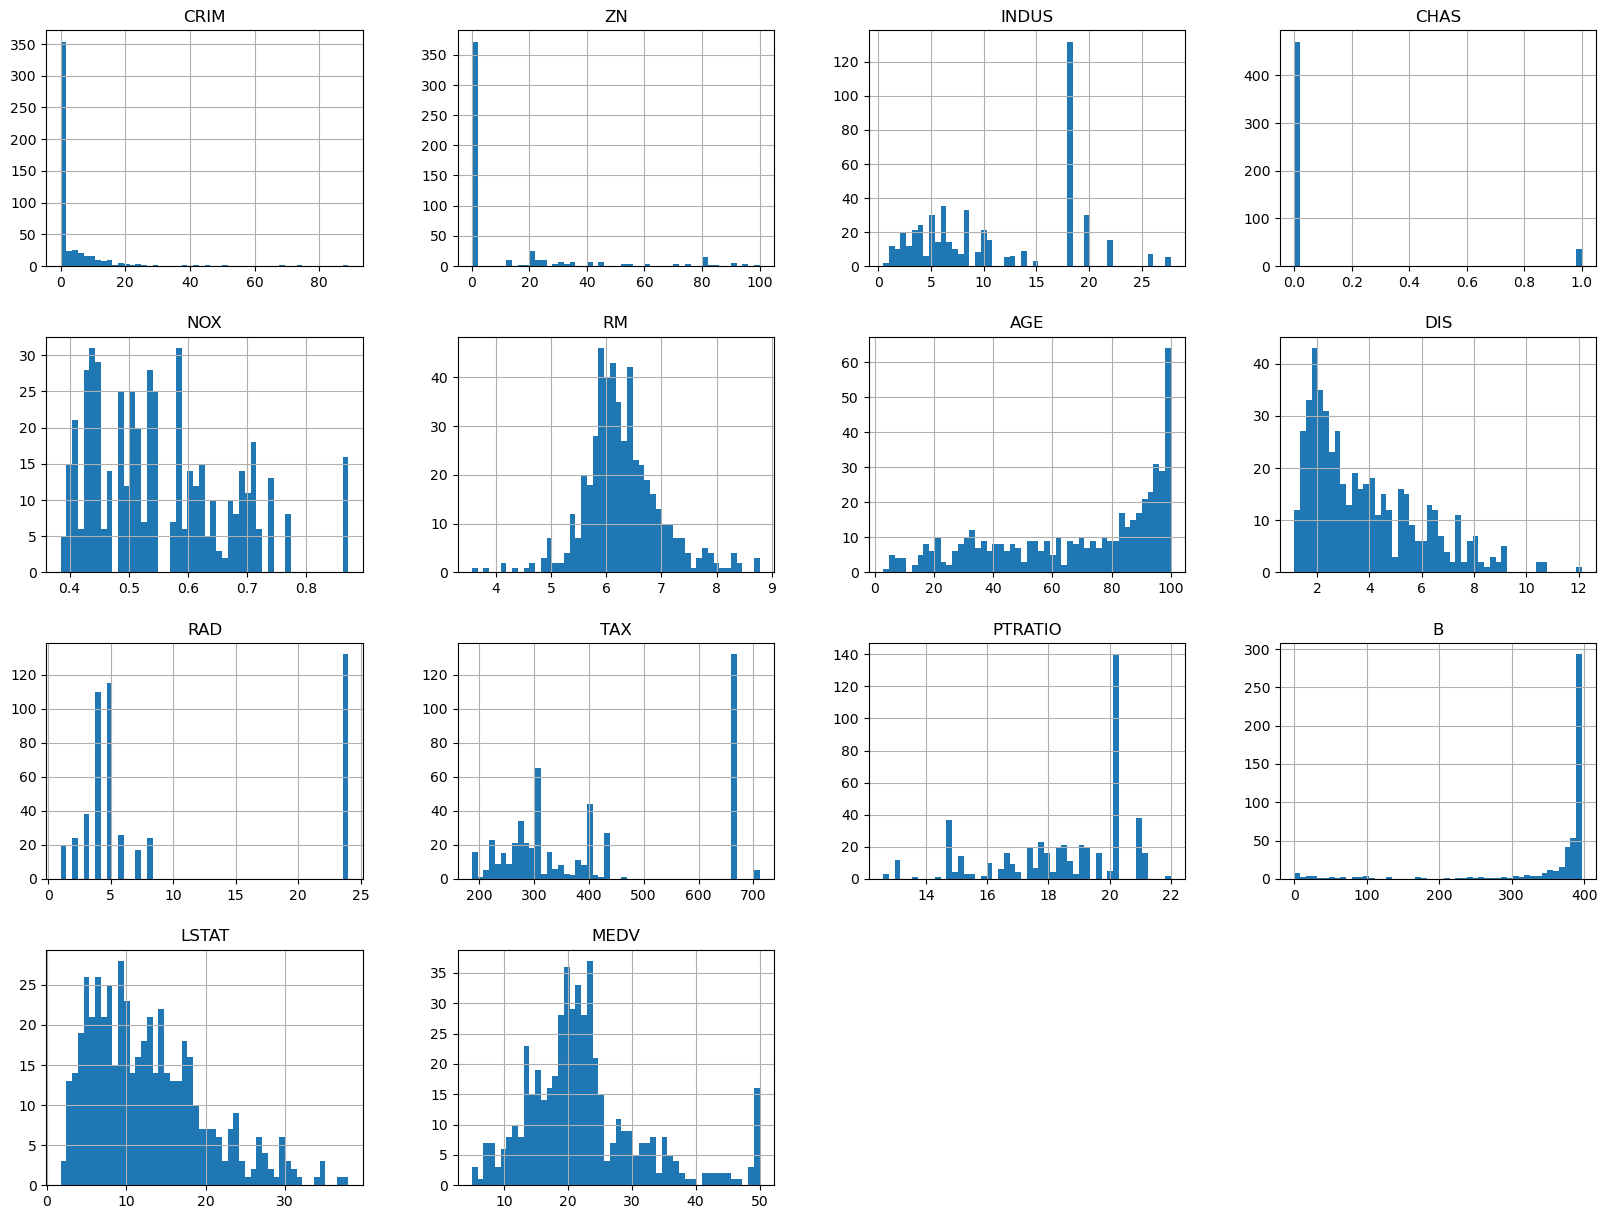

In [9]:
housing.hist(bins=50, figsize= (20,15))

## Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'Rows in train set is:{len(train_set)}\nRows in test set is: {len(test_set)}')

Rows in train set is:404
Rows in test set is: 102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    


In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()

# Correlation

In [15]:
corr_matrix = housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257663,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292252,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.385324,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100385,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300860,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257663,0.292252,-0.385324,0.100385,-0.300860,1.000000,-0.241318,0.204159,-0.200095,-0.282449,-0.331544,0.122472,-0.603006,0.680857
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241318,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.204159,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.200095,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.282449,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [16]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='B', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

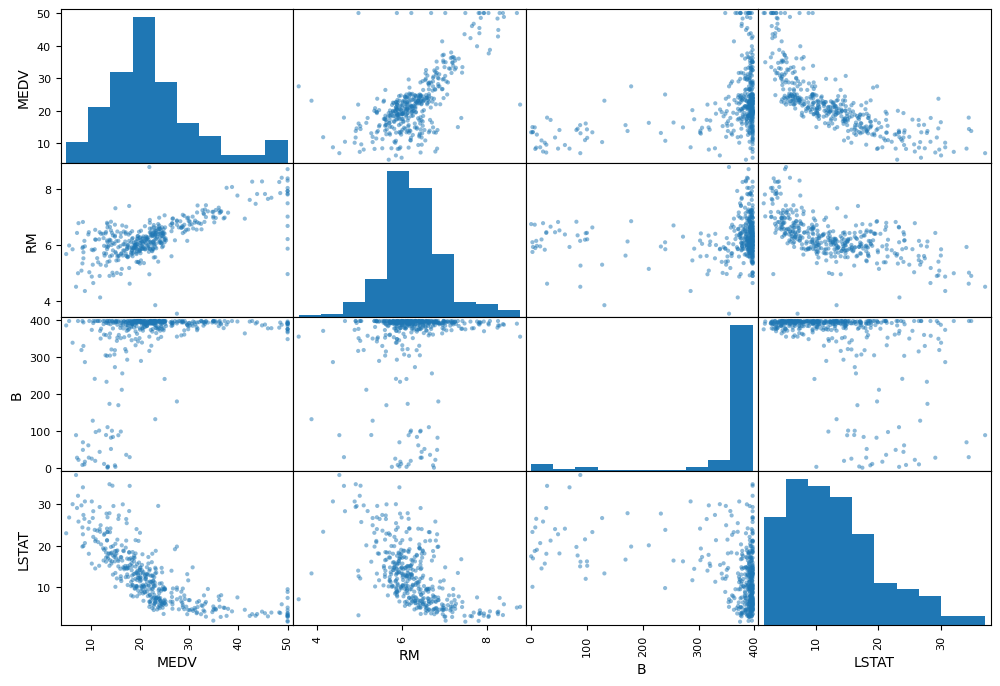

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'B', 'LSTAT' ]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

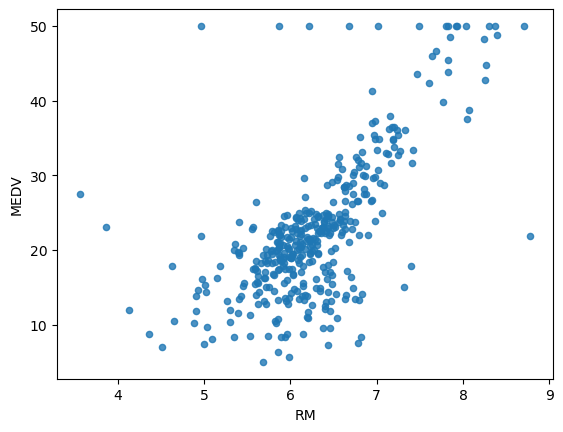

In [18]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

In [19]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

# Handling missing values

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [22]:
X = imputer.transform(housing)

In [23]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [24]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a Pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('std_scaler', StandardScaler()),
])

In [26]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [27]:
housing_num_tr.shape

(404, 13)

# Model Selection

In [44]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(housing_num_tr, housing_labels)


In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
#model.predict(prepared_data)

In [49]:
#list(some_labels)

In [50]:
housing_predictions = model.predict(housing_num_tr)

In [51]:
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(housing_labels, housing_predictions)
#rmse = np.sqrt(mse)
#rmse

In [52]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#model.fit(housing_num_tr, housing_labels)


In [53]:
#model.predict(prepared_data)

In [54]:
#list(some_labels)

In [55]:
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(housing_labels, housing_predictions)
#rmse = np.sqrt(mse)
#rmse

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [57]:
model.predict(prepared_data)

array([22.179, 25.137, 16.302, 23.405, 23.587])

In [58]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

1.1873761623807753

# Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)


In [61]:
rmse_scores

array([2.9029185 , 2.71455572, 4.49314967, 2.94685531, 3.51544276,
       2.57056477, 4.78578734, 3.31207601, 3.06320829, 3.33627945])

In [62]:
def print_scores(scores):
    print('scores:', scores)
    print('Mean:', scores.mean())
    print('standard deviation:', scores.std())

In [63]:
print_scores(rmse_scores)

scores: [2.9029185  2.71455572 4.49314967 2.94685531 3.51544276 2.57056477
 4.78578734 3.31207601 3.06320829 3.33627945]
Mean: 3.3640837826117247
standard deviation: 0.6965096133985466


# Model Saving

In [64]:
from joblib import dump,load
dump(model, 'Real_estates.joblib')

['Real_estates.joblib']

# Model Testing

In [65]:
X_test = strat_test_set.drop('MEDV', axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_rmse

3.006416468221286

In [67]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using Model

In [68]:
model = load('Real_estates.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.179])